**Name: Christ-Brian Amedjonekou**  
**Date: 05/23/2019**  
**MAT 4880-D692 (Math Modeling II) CBA Final**  
**Spring 2019, Section: D692, Code: 36561**  
**Instructor: Johann Thiel**


# The Wolf Problem:

#### Variables:


$W = \text{Wolves State Variable}$

$M = \text{Moose State Variable}$ 

$g_W = \text{Growth Rate of Wolves} = rW\Big(1 - \cfrac{W}{K_W}\Big)$

$g_M = \text{Growth Rate of Moose} = rM\Big(1 - \cfrac{M}{K_M}\Big)$

$c_W = \text{Competition Term of Wolves} = + \alpha WM$

$c_M = \text{Competition Term of Moose} = - \alpha WM$

$K_W = \text{Carrying Capacity of Wolves}$

$K_M = \text{Carrying Capacity of Moose}$

$\cfrac{dW}{dt} = g_W + c_W =  rW\Big(1 - \cfrac{W}{K_W}\Big) + \alpha WM$

$\cfrac{dM}{dt} = g_M - c_M =rM\Big(1 - \cfrac{M}{K_M}\Big) - \alpha WM$


#### Assumptions

$K_W = \text{Carrying Capacity of Wolves} = 3000$

$g_W = \text{Growth Rate of Wolves} = 0.02W\Big(1 - \cfrac{W}{3000}\Big)$

$K_M = \text{Carrying Capacity of Moose} = 100000$

$g_M = \text{Growth Rate of Moose} = 0.15M\Big(1 - \cfrac{M}{100000}\Big)$

$c_W = \text{Competition Term of Wolves} = +  0.01*WM; \alpha = 0.01$

$c_M = \text{Competition Term of Moose} = -  0.04*WM; \alpha = 0.04$



**Dynamical System**

$\cfrac{dW}{dt} = 0.02W\Big(1 - \cfrac{W}{3000}\Big) +  0.01*WM$

$\cfrac{dM}{dt} = 0.15M\Big(1 - \cfrac{M}{100000}\Big) -  0.04*WM$

## Objective

1. Find Equilibrium Points and plot Vector Field

### Equilibrium Points

In [15]:
import sympy as sp
from sympy.solvers import solve
import math as m
import numpy as np
import matplotlib.pyplot as plt
import School_Toolkit.Mathematical_Modeling as mm

**Defining Variables/System**

In [4]:
sp.init_printing()
W, M = sp.symbols('W M')
dWdt = 0.02*W*(1 - W/3000) + 0.01*W*M
dMdt = 0.15*M*(1 - M/100000) - 0.04*W*M

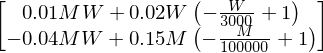

In [7]:
sp.Matrix([dWdt, dMdt])

**Showing Equilibrium**

In [8]:
solve([dWdt, dMdt], W, M)

**Vector Field**

In [64]:
dW_dt = lambda W, M: 0.02*W*(1 - W/3000) + (0.01/W)*W*M
dM_dt = lambda W, M: 0.15*M*(1 - M/100000) - (0.04/M)*W*M

/Users/Chris/anaconda/envs/ml_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/Chris/anaconda/envs/ml_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in multiply
  """Entry point for launching an IPython kernel.
/Users/Chris/anaconda/envs/ml_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/Chris/anaconda/envs/ml_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


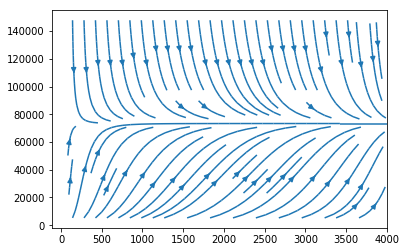

In [62]:
x, y = np.linspace(0, 4000), np.linspace(0, 150000)
X, Y = np.meshgrid(x, y)
U, V = dW_dt(X, Y), dM_dt(X, Y)
fig, ax = plt.subplots()
ax.streamplot(X, Y, U, V)

2. Stability w/ Eigenvalue method

### Jacobian

In [36]:
import scipy.linalg as sci

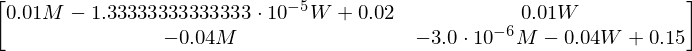

In [22]:
mm.poorManJacobian(dWdt, dMdt, W, M, [0, 0])

**@  (0,0)**

In [41]:
answer = mm.poorManJacobian(dWdt, dMdt, W, M, [[0, 0]], False)
answer

array([[0.02, 0.  ],
       [0.  , 0.15]])

In [42]:
sci.eig(answer)

(array([0.02+0.j, 0.15+0.j]), array([[1., 0.],
        [0., 1.]]))

**@  (0, 100000)**

In [43]:
answer = mm.poorManJacobian(dWdt, dMdt, W, M, [[0, 100000]], False)
answer

array([[ 1.00002e+03,  0.00000e+00],
       [-4.00000e+03, -1.50000e-01]])

In [44]:
sci.eig(answer)

(array([-1.50000e-01+0.j,  1.00002e+03+0.j]),
 array([[ 0.        ,  0.24257443],
        [ 1.        , -0.9701328 ]]))

**@  (3000,0)**

In [45]:
answer = mm.poorManJacobian(dWdt, dMdt, W, M, [[3000, 0]], False)
answer

array([[-2.0000e-02,  3.0000e+01],
       [ 0.0000e+00, -1.1985e+02]])

In [46]:
sci.eig(answer)

(array([-2.0000e-02+0.j, -1.1985e+02+0.j]), array([[ 1.        , -0.24285942],
        [ 0.        ,  0.97006149]]))

**@  (3.75007490624813,−1.9974999500625)**

In [47]:
answer = mm.poorManJacobian(dWdt, dMdt, W, M, [[3.75007490624813,-1.9974999500625]], False)
answer

array([[-2.50004994e-05,  3.75007491e-02],
       [ 7.98999980e-02,  2.99624993e-06]])

In [48]:
sci.eig(answer)

(array([-0.05474956+0.j,  0.05472756+0.j]), array([[-0.56527545, -0.56507871],
        [ 0.82490222, -0.825037  ]]))

**(3000, 0) is the only stable equilibrium point since eigvalues are both negative**

4. Linearize the system

### Linearized Plot

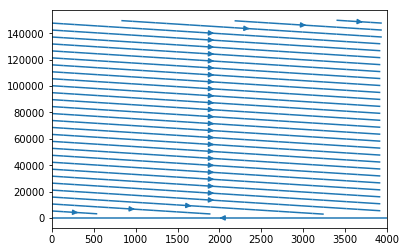

In [55]:
dW_dtLIN = lambda W, M: -2.0000*m.pow(10,-2)*X + 3.0000*m.pow(10,1)*Y
dM_dtLIN = lambda W, M: 0.0000*m.pow(10,0)*X - 1.1985*m.pow(10,2)*Y
x, y = np.linspace(0, 4000), np.linspace(0, 150000)
X, Y = np.meshgrid(x, y)
U, V = dW_dtLIN(X, Y), dM_dtLIN(X, Y)
fig, ax = plt.subplots()
ax.streamplot(X, Y, U, V)

### Simulation

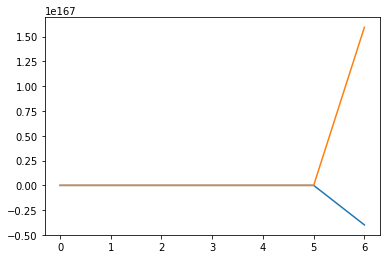

In [59]:
L = [[2000, 30000]]
delT = 2.5
for i in range(200):
    xlast, ylast = L[-1][0], L[-1][1]
    xnext = xlast + delT*dW_dt(xlast,ylast)
    ynext = ylast + delT*dM_dt(xlast,ylast)
    L.append([xnext,ynext])
    
plt.figure()
L = np.array(L)
t= np.linspace(0,200,201)
plt.plot(t, L[:, 0])
plt.plot(t, L[:, 1])